In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas_datareader import data, wb
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import finsymbols
from sklearn.decomposition import KernelPCA
import pickle

In [2]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [3]:
start = dt.datetime(2013, 1, 1)
date_range = pd.date_range(start, dt.date.today())

In [4]:
sp500 = finsymbols.get_sp500_symbols()
sp500_symbols = [item['symbol'] for item in sp500]

In [5]:
%%time
# stock_values = pd.DataFrame()
# for symbol in sp500_symbols:
#     print(symbol)
#     if '.' not in symbol:
#         stock_values[symbol] = data.DataReader(symbol, 'yahoo', start)['Adj Close']

# stock_values['SPY'] = data.DataReader('SPY', 'yahoo', start)['Adj Close']

# import pickle
# pickle.dump(stock_values, open( "stock_values.p", "wb" ))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11.9 µs


In [6]:
stock_values = pickle.load(open("stock_values.p", "rb"))
stock_values = stock_values.dropna()

In [7]:
stock_values.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,AES,...,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS,SPY
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-05,172.308351,38.465674,59.619691,110.786234,39.905680,246.400002,94.730003,4.96,161.004757,11.728668,...,5.937568,44.728651,31.485367,44.390537,37.500000,58.492529,119.204189,23.281592,47.218636,205.254540
2016-07-06,171.847239,39.821338,61.015825,111.197640,40.263486,250.639850,95.180000,5.04,161.264453,11.757509,...,5.988975,44.640312,31.856819,45.123121,37.509998,59.288491,121.022812,23.827875,47.805141,206.485614
2016-07-07,171.562715,40.338244,61.073597,110.394416,40.144217,253.024140,95.139999,5.02,160.944828,11.632532,...,6.027531,44.866066,31.886143,45.172619,37.520000,59.387105,121.261318,24.245036,47.407509,206.357578
2016-07-08,173.770161,40.855150,61.776481,112.755116,41.038742,263.987877,96.790001,5.10,164.660554,11.844032,...,6.130346,46.102805,32.267369,45.944799,37.740002,60.408470,124.113476,24.572806,48.212713,209.430334
2016-07-11,174.643328,41.079467,61.959417,113.097955,41.943205,267.379749,97.139999,5.01,163.501884,12.065146,...,6.104642,46.348189,32.120745,46.518987,37.959999,60.887456,124.302297,24.761523,48.003958,210.168979


In [8]:
spy = pd.DataFrame(stock_values.pop('SPY'))

In [9]:
spy.tail()

,SPY
Date,
2017-05-05,239.699997
2017-05-08,239.660004
2017-05-09,239.440002
2017-05-10,239.869995
2017-05-11,239.380005


In [10]:
scale_function = lambda x : (x - x.mean()) / x.std()

In [11]:
pca = KernelPCA().fit(stock_values.apply(scale_function))

In [12]:
len(pca.lambdas_)

215

In [59]:
output_df = pd.DataFrame(index=spy.index)
new_cols = stock_values.ix[:50]
pca = KernelPCA(n_components=1).fit(new_cols.apply(scale_function))
pd.merge(output_df, pd.Series(pca.transform(new_cols)))

Exception: Data must be 1-dimensional

In [13]:
pca.lambdas_[:10].round()

array([ 54141.,  23274.,   8820.,   4508.,   3683.,   2113.,   1599.,
         1149.,    975.,    835.])

In [14]:
normal2 = lambda x : x / x.sum()

In [15]:
normal2(pca.lambdas_)[:10]

array([ 0.50063237,  0.21521433,  0.08155838,  0.0416841 ,  0.0340575 ,
        0.01953944,  0.01478161,  0.01062103,  0.00901208,  0.00772267])

In [16]:
normal2(pca.lambdas_)[:10].sum()

0.93482350540250836

In [17]:
pca = KernelPCA(n_components=1).fit(stock_values.apply(scale_function))
spy['PCA_1'] = pca.transform(stock_values)

In [18]:
print(spy['PCA_1'].head())
print(spy['SPY'].head())

Date
2016-07-05   -1143.208583
2016-07-06   -1148.638008
2016-07-07   -1149.589768
2016-07-08   -1170.321753
2016-07-11   -1177.896254
Name: PCA_1, dtype: float64
Date
2016-07-05    205.254540
2016-07-06    206.485614
2016-07-07    206.357578
2016-07-08    209.430334
2016-07-11    210.168979
Name: SPY, dtype: float64


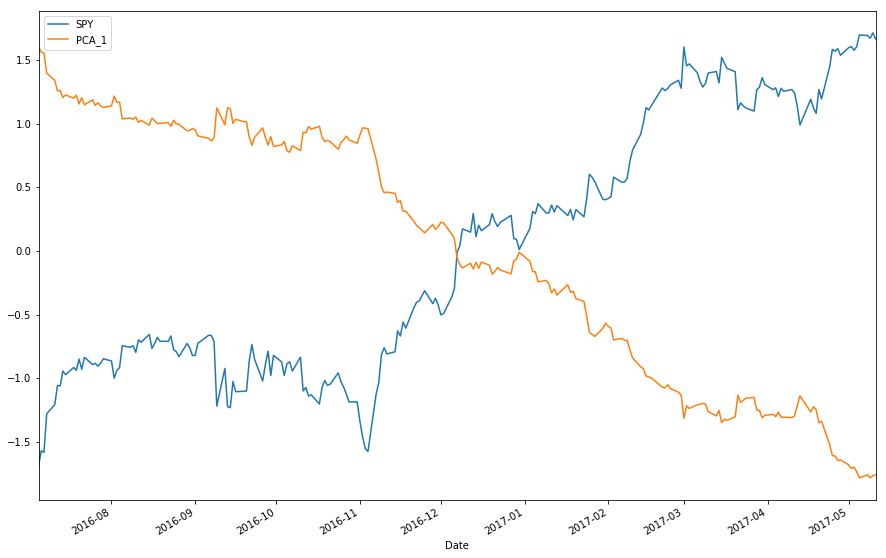

In [19]:
spy.apply(scale_function).plot()

In [20]:
pca = KernelPCA(n_components=5).fit(stock_values.apply(scale_function))
weights = normal2(pca.lambdas_)
pca_components = pca.transform(stock_values)
spy['PCA_5'] = np.dot(pca_components, weights)

In [21]:
pca_components.shape

(216, 5)

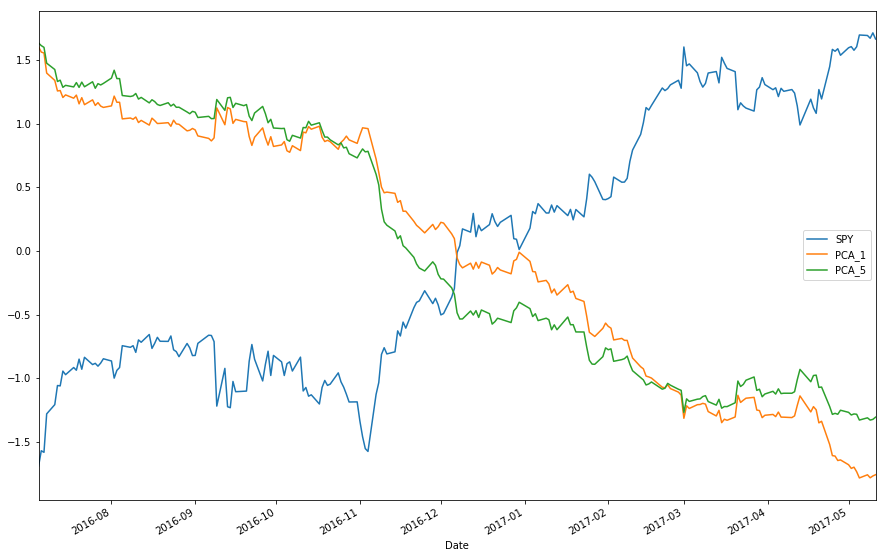

In [22]:
spy.apply(scale_function).plot()

In [23]:
mpl_dates = mpl.dates.date2num(stock_values.index.to_pydatetime())

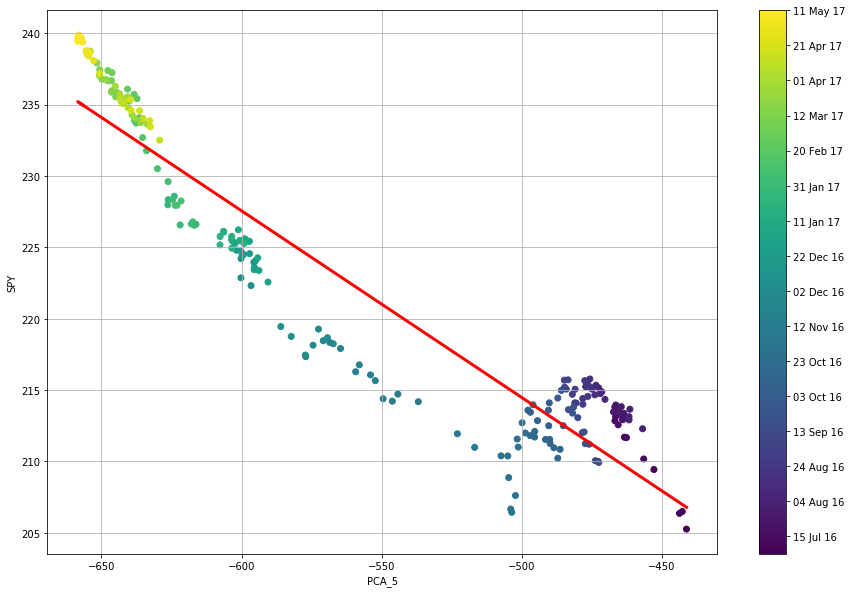

In [24]:
plt.scatter(spy['PCA_5'], spy['SPY'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(spy['PCA_5'], spy['SPY'], 1), spy['PCA_5'])
plt.plot(spy['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('SPY')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=20), format=mpl.dates.DateFormatter('%d %b %y'))

In [25]:
cut_date1 = '2016/8/1'
cut_date2 = '2016/12/1'

early_pca = spy[spy.index < cut_date1]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca, spy['SPY'][spy.index < cut_date1], 1), early_pca)

mid_pca = spy[(spy.index < cut_date2) & (spy.index >= cut_date1)]['PCA_5']
mid_reg = np.polyval(np.polyfit(mid_pca, spy['SPY'][(spy.index < cut_date2) & (spy.index >= cut_date1)], 1), mid_pca)

late_pca = spy[spy.index >= cut_date2]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca, spy['SPY'][spy.index >= cut_date2], 1), late_pca)

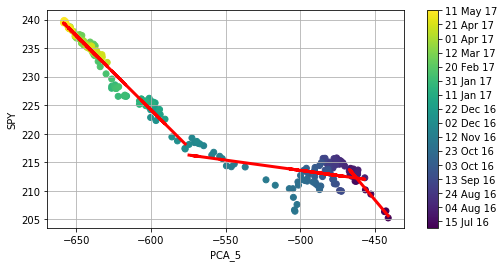

In [26]:
plt.figure(figsize=(8,4))
plt.scatter(spy['PCA_5'], spy['SPY'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(mid_pca, mid_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('SPY')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=20), format=mpl.dates.DateFormatter('%d %b %y'))